# **Import necessary libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

# **Read dataset**

In [17]:
# Load the dataset
df = pd.read_csv('/content/bank-full.csv', delimiter=';')

In [18]:
# Display the first few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
# Display the bottom few rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## **Sanity check of data**

In [19]:
# Check the shape of the data
df.shape

(45211, 17)

In [20]:
# Check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [21]:
# Check for missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [22]:
# Finding duplicates
df.duplicated().sum()

0

In [24]:
# Identifying garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
******************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
******************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
******************************
default
no     44396
yes      815
Name: count, dtype: int64
******************************
housing
yes    25130
no     20081
Name: count, dtype: int64
******************************
loan
no     37967
yes     7244
Name: count, dtype: int64
******************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
******************************
month
may    13766
ju

In [25]:
for col in ['job', 'education', 'contact', 'poutcome']:
    df[col] = df[col].replace('unknown', 'other')


In [26]:
# Check if the replacement worked
for col in ['job', 'education', 'contact', 'poutcome']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("***" * 10)  # Separator for readability


Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: count, dtype: int64
******************************
Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
other         1857
Name: count, dtype: int64
******************************
Value counts for contact:
contact
cellular     29285
other        13020
telephone     2906
Name: count, dtype: int64
******************************
Value counts for poutcome:
poutcome
other      38799
failure     4901
success     1511
Name: count, dtype: int64
******************************


# **Exploratory data analysis**

In [28]:
#descriptive statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [29]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,other,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,38799,39922


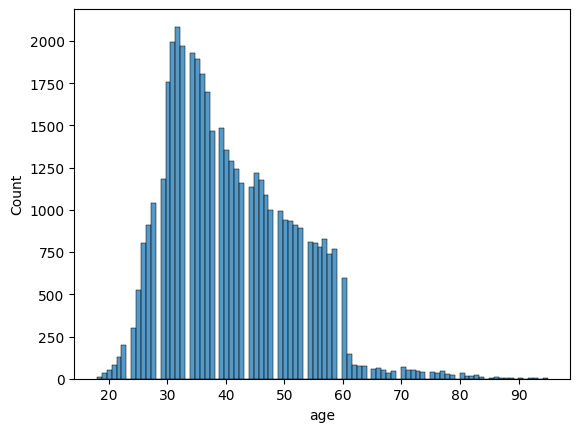

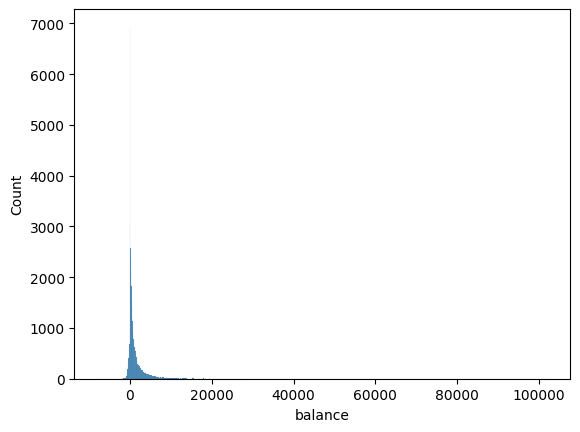

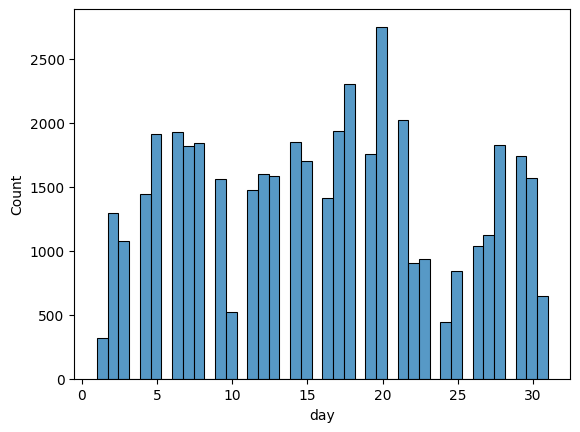

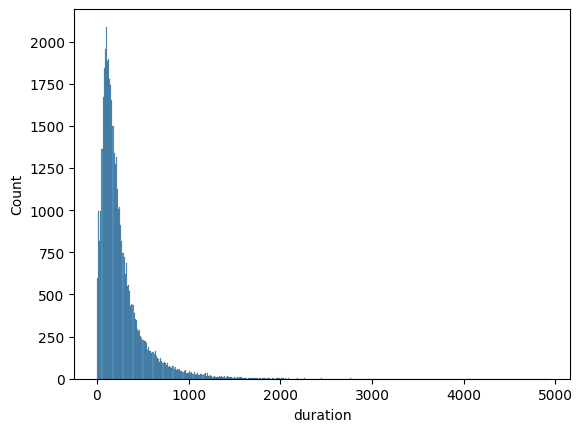

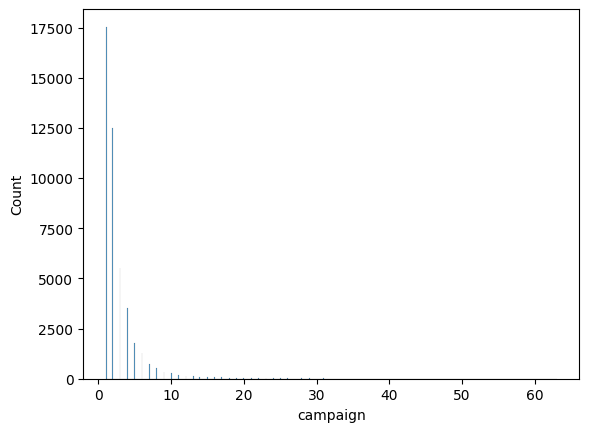

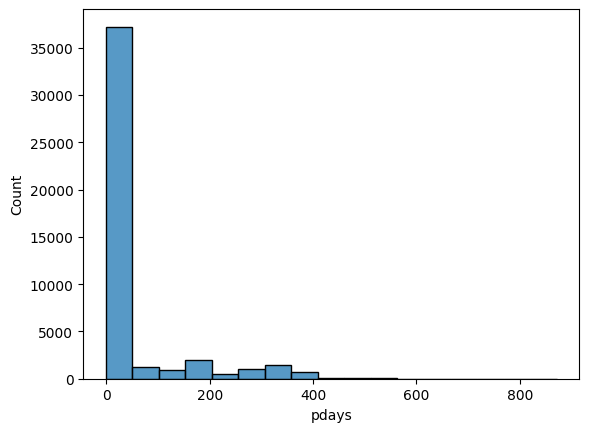

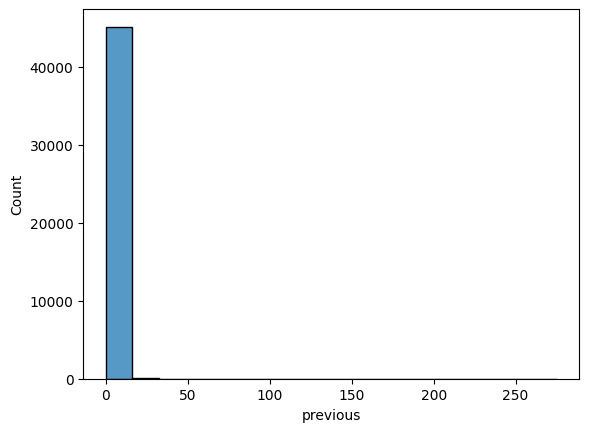

In [31]:
#histogram to understand the distribution
for i in df.select_dtypes(include = 'number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

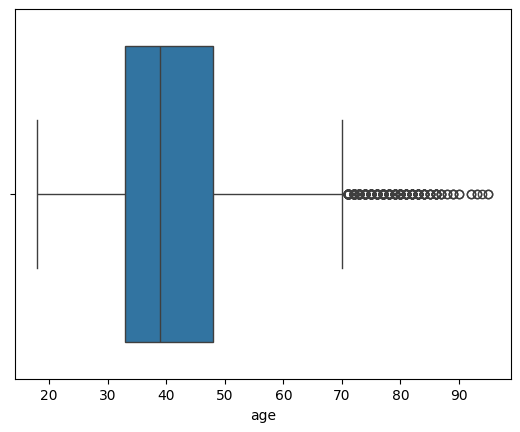

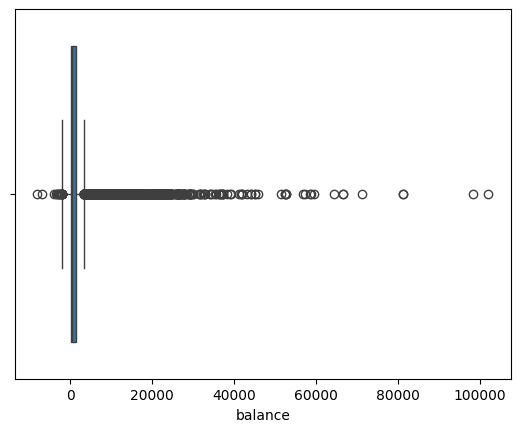

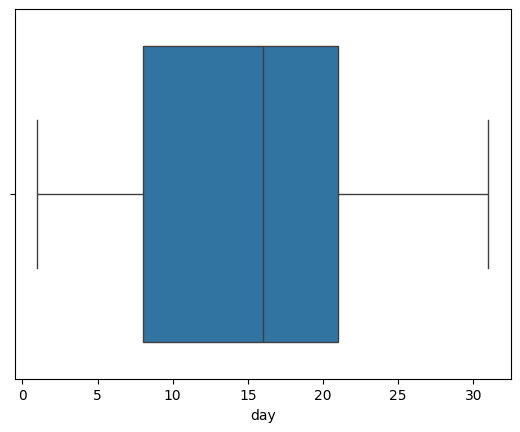

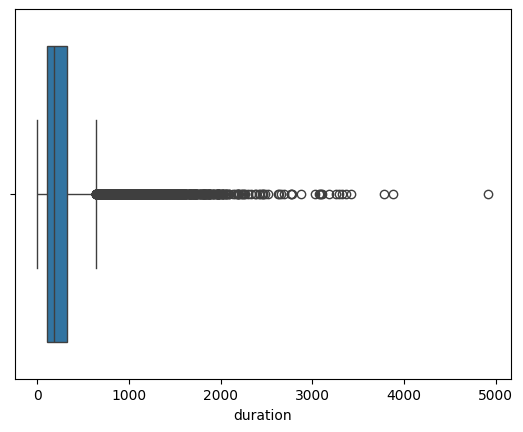

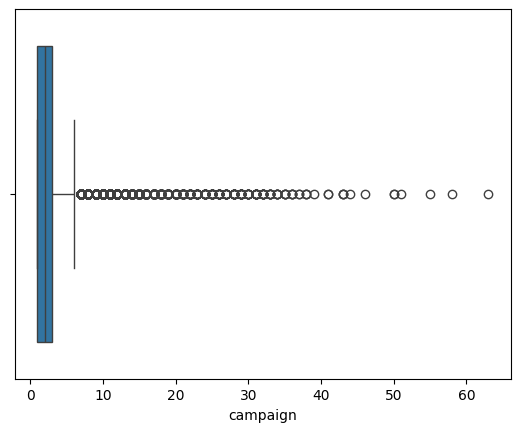

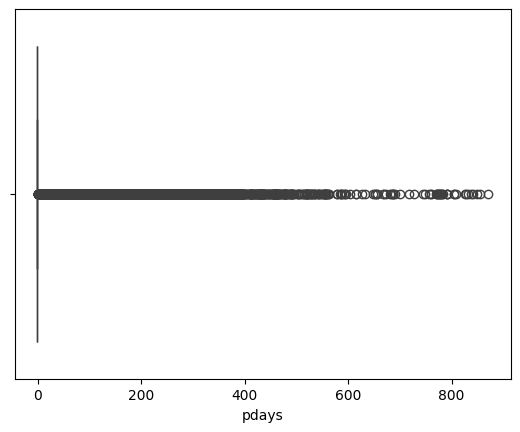

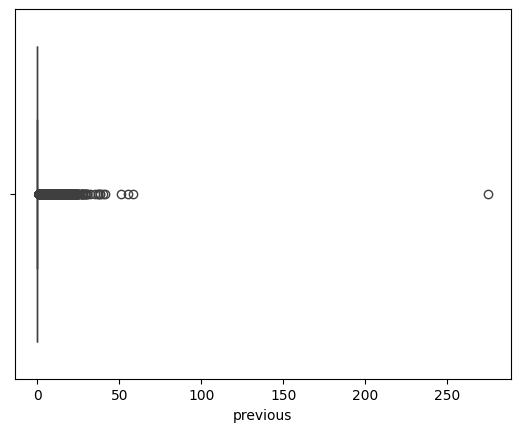

In [32]:
#Boxplot to identify Outliers
for i in df.select_dtypes(include = 'number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()

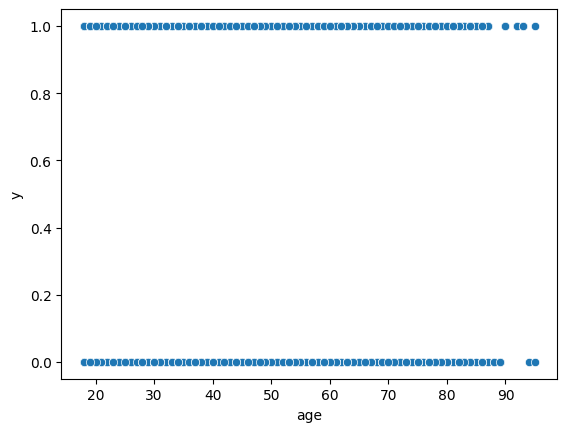

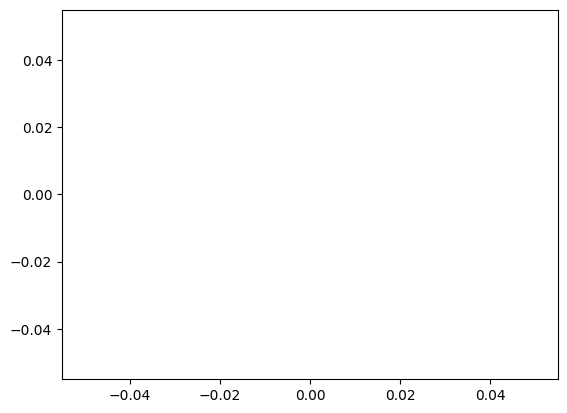

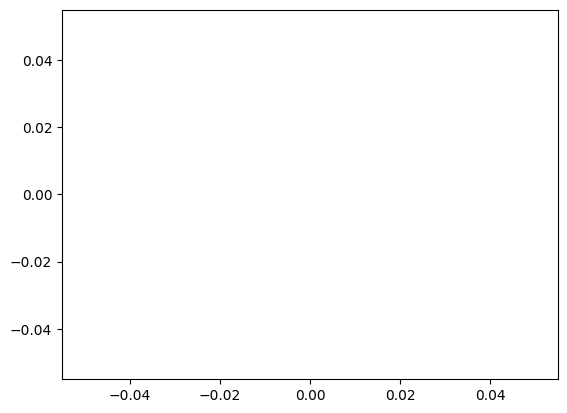

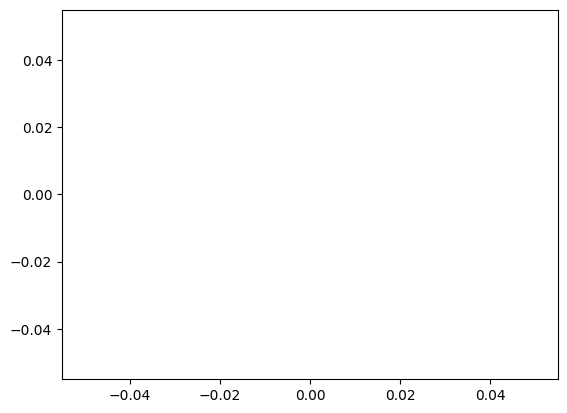

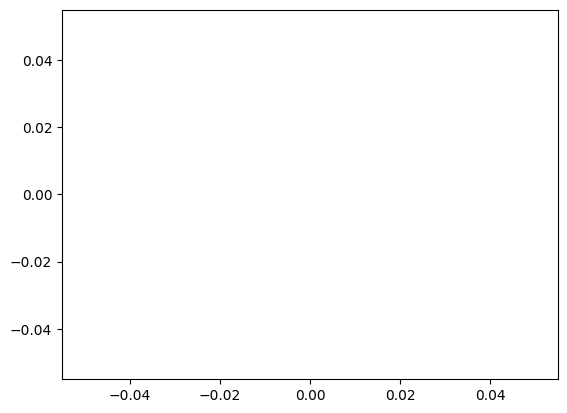

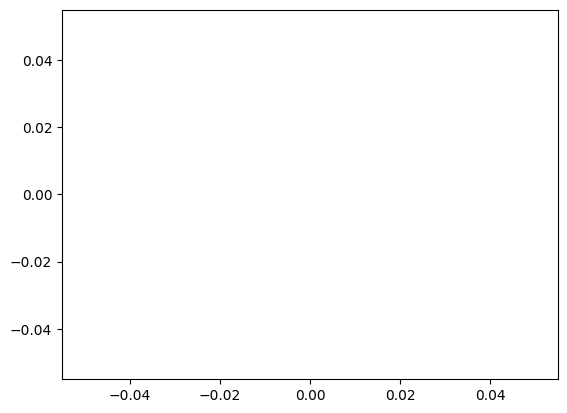

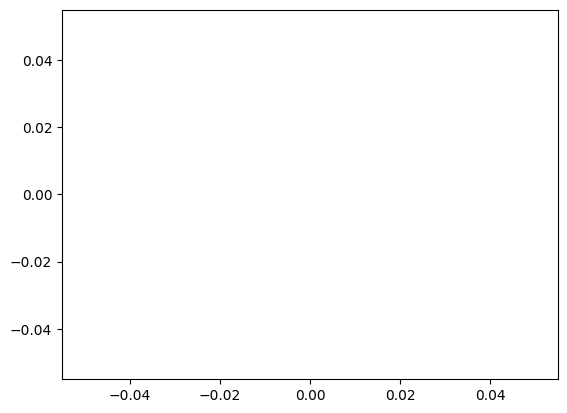

In [39]:
#scatter plot to understand the relationship
for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
  df['y'] = df['y'].map({'no': 0, 'yes': 1})
  sns.scatterplot(data=df, x=i, y='y')
  plt.show()

In [34]:
df.select_dtypes(include = 'number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [13]:
# Check unique values in the target column
print(df['y'].unique())


['no' 'yes']
